# Unsupervised Machine Learning

In [54]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [55]:
# Import Dataset
df = pd.read_csv("E:\\Pycharm Projects\\Machine_Learning\\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


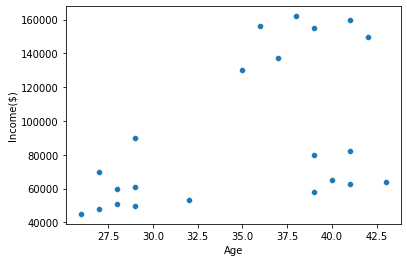

In [56]:
# Scatter Plot of Age vs Income($)
sns.scatterplot(x = df["Age"], y = df["Income($)"])
plt.show()

In [58]:
# Create the object of the model
km1 = KMeans(n_clusters = 3)

In [59]:
# Fit the model
km1.fit(df[["Age", "Income($)"]])

KMeans(n_clusters=3)

In [60]:
# Predicting Clusters
y_prediction = km1.predict(df[["Age", "Income($)"]])

In [61]:
y_prediction

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [62]:
# Create New Column called "Cluster" and append y_prediction to it.
df["Cluster"] = y_prediction
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [69]:
km1.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

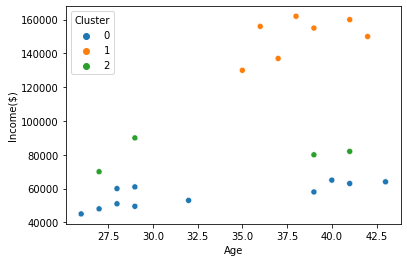

In [72]:
sns.scatterplot(x = df["Age"], y = df["Income($)"], hue = df["Cluster"], palette = "tab10")
plt.show()

In [64]:
# Scaling the values using minmaxscaler and Applying Kmeans again

# Create the object scaler using class MinMaxScaler
scaler = MinMaxScaler()

# Fit the Scaler
scaler.fit(df[["Age", "Income($)"]])

# Transform the Data
scaled_df = scaler.transform(df[["Age", "Income($)"]])

# Creating DataFrame with scaled_df
scaled_df = pd.DataFrame(scaled_df, columns = ["Age", "Income($)"])

In [65]:
# Print scaled_df
scaled_df.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [66]:
# Create the object of Kmeans
km2 = KMeans(n_clusters = 3)

# Fit the Model
km2.fit(scaled_df[["Age", "Income($)"]])

# Transform the Data
y_prediction = km2.predict(scaled_df[["Age", "Income($)"]])

In [67]:
# Print y_prediction
y_prediction

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [68]:
# Create column "Cluster" in scaled_df with y_prediction
scaled_df["Cluster"] = y_prediction

# Print scaled_df
scaled_df.head()

,Age,Income($),Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


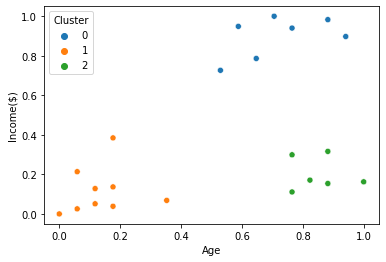

In [41]:
# Plot the Clusters
sns.scatterplot(x = scaled_df["Age"], y = scaled_df["Income($)"], hue = scaled_df["Cluster"], palette = "tab10")
plt.show()

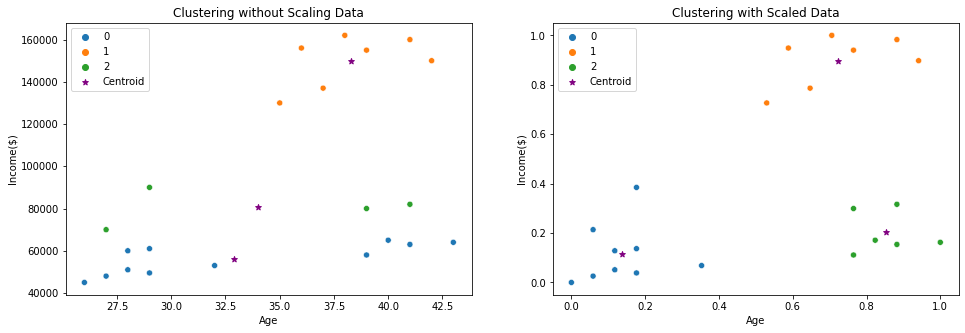

In [78]:
# Comparing Clustering without Scaling and with Scaling

plt.figure(figsize = (16,5)) # Defining figure size

plt.subplot(1,2,1)
sns.scatterplot(x = df["Age"], y = df["Income($)"], hue = df["Cluster"], palette = "tab10")
plt.scatter(x = km1.cluster_centers_[:, 0], y = km1.cluster_centers_[:, 1], marker = "*", color = "purple", label = "Centroid")
plt.title("Clustering without Scaling Data")
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x = scaled_df["Age"], y = scaled_df["Income($)"], hue = scaled_df["Cluster"], palette = "tab10")
plt.scatter(x = km2.cluster_centers_[:, 0], y = km2.cluster_centers_[:, 1], marker = "*", color = "purple", label = "Centroid")
plt.title("Clustering with Scaled Data")
plt.legend()

plt.show()

**As we can see clustering with scaled data giving more correct clusters compared to non-scaled data and we can also see centroid are perfectly placed in case of scaled data.**

### Elbow Method for Optimal Number of Clusters(k):

In [80]:
SSE = [] # Sum of Squared Errors
for k in range(1,11):
    km = KMeans(n_clusters = k)
    km.fit(scaled_df[["Age", "Income($)"]])
    SSE.append(km.inertia_)

# print SSE
print(SSE)

[5.434011511988179, 2.091136388699078, 0.4750783498553097, 0.3491047094419566, 0.2621792762345213, 0.22443334487241415, 0.18833966929558865, 0.13265419827245162, 0.1062989742140513, 0.08510915216361348]


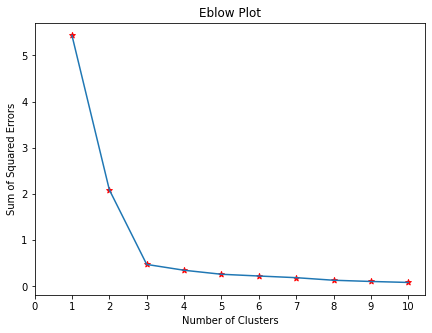

In [99]:
# Elbow Plot
plt.figure(figsize = (7,5))
plt.plot(range(1,11), SSE, color = "tab:blue")
plt.scatter(x = range(1,11), y = SSE, marker = "*", color = "red")
plt.title("Eblow Plot")
plt.xticks(range(0,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

**So we can see sudden bend started from k = 3 for optimal number of clusters are 3**